# graph_05_06_02_w

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../../'))
sys.path.insert(0, os.path.abspath('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa'))

In [2]:
import qiskit
#provider = qiskit.IBMQ.load_account()
from qiskit_optimization.algorithms import GoemansWilliamsonOptimizer

from helpers import *
from shared.QiskitMaxcut import *
from shared.graph_helper import *

In [3]:
#%load_ext autoreload
#%autoreload 2

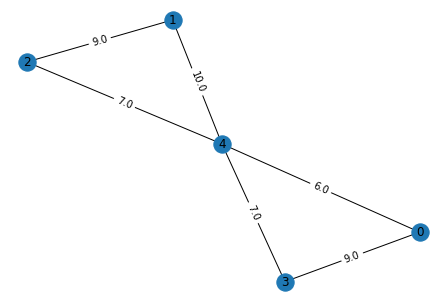

In [4]:
# ---- Define graph and MaxCut ----
filename = "graph_05_06_02_w.txt"
graph = load_nx_graph_from(f"../data/{filename}")
opt_max_cut = -get_max_cut(graph.name)
max_cut = Maxcut(graph, opt_max_cut)
max_cut_qubo = max_cut.to_qubo()
max_cut.draw()

In [5]:
from qiskit_ionq import IonQProvider
provider = IonQProvider("MPRTyJJN82dEDlmeACadX3VdOLl4DFmv")

In [6]:
print(provider.backends())

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


### Goemans Williamson Solution

In [7]:
optimizer = GoemansWilliamsonOptimizer(5)
result = optimizer.solve(max_cut_qubo)
mean, distribution = max_cut.analyse(result, print_output=True)
max_cut.plot_histogram(distribution, mean)

optimal function value: 35.0
optimal value: [0 1 0 1 0]
status: SUCCESS
00011: value: -32.000, probability: 25.0%
00101: value: -32.000, probability: 25.0%
01110: value: -33.000, probability: 25.0%
01010: value: -35.000, probability: 25.0%
Expectation Value: -33.0
Highest Exp.Value: -32 with 50.0 %
Lowest Exp.Value: -35 with 25.0 %
Highest Probability: -32 with 50.0 %
Ratio r: 0.3333333333333333
Approiximation ratio: 0.9428571428571428
MSE: 1.6666666666666667
RMSE: 1.2909944487358056


## Parameters

In [8]:
BACKEND, EVAL_NUM, MAX_ITER, MAX_P, SHOTS = load_configs()
display_configs()
all_results = {}

Backend = Simulator
EVAL_NUM = 10
MAX_ITER = 5
MAX_P = 4
SHOTS = 200


## QAOA

In [9]:
from helpers.qaoa_helper import *

In [ ]:
qaoa_p_means = []
qaoa_p_ratios = []
qaoa_p_approx_ratios = []

for p in range(1,MAX_P+1):
    m, r, ar, optimal_params = start_qaoa_evaluation(max_cut, eval_num=EVAL_NUM, reps=p, maxiter=MAX_ITER)
    qaoa_p_means.append(m)
    qaoa_p_ratios.append(r)
    qaoa_p_approx_ratios.append(ar)
    print()
    print(f"Optimal Params: {optimal_params}")

all_results["QAOA"] = [qaoa_p_means, qaoa_p_ratios, qaoa_p_approx_ratios]

p=1: 

In [ ]:
display_boxplots_results(qaoa_p_means, qaoa_p_ratios, qaoa_p_approx_ratios)

In [ ]:
# Save results 
filename = f'comparison_{BACKEND.name}_{graph.name}_results.npy'
with open(filename, 'wb') as f:
    np.save(f, all_results)
    print(f"Saved results to {filename}")

## QAOA with TQA

In [ ]:
from helpers.qaoa_helper import *

In [ ]:
tqa_p_means = []
tqa_p_ratios = []
tqa_p_approx_ratios = []
tqa_init_points = []

for p in range(1,MAX_P+1):
    tqa_initial_points = calculate_tqa(graph, p)
    m, r, ar, _ = start_qaoa_evaluation(max_cut, eval_num=EVAL_NUM, reps=p, init_points=tqa_initial_points, maxiter=MAX_ITER)
    tqa_p_means.append(m)
    tqa_p_ratios.append(r)
    tqa_p_approx_ratios.append(ar)
    tqa_init_points.append(tqa_initial_points)
    
all_results["TQA QAOA"] = [tqa_p_means, tqa_p_ratios, tqa_p_approx_ratios, tqa_init_points]

In [ ]:
display_boxplots_results(tqa_p_means, tqa_p_ratios, tqa_p_approx_ratios, prefix='TQA ')

In [ ]:
# Save results 
filename = f'comparison_{BACKEND.name}_{graph.name}_results.npy'
with open(filename, 'wb') as f:
    np.save(f, all_results)
    print(f"Saved results to {filename}")

## WarmStart QAOA

In [ ]:
from helpers.warmstart_helper import *

In [ ]:
ws_p_means = []
ws_p_ratios = []
ws_p_approx_ratios = []
ws_opt_epsilons = []

for p in range(1,MAX_P+1):
    opt_epsilon = 0.25 
    m, r, ar = start_ws_qaoa_evaluation(max_cut, eval_num=EVAL_NUM, reps=p, epsilon=opt_epsilon, maxiter=MAX_ITER)
    ws_p_means.append(m)
    ws_p_ratios.append(r)
    ws_p_approx_ratios.append(ar)
    ws_opt_epsilons.append(opt_epsilon)
    
all_results["WarmStart QAOA"] = [ws_p_means, ws_p_ratios, ws_p_approx_ratios, ws_opt_epsilons]

In [ ]:
display_boxplots_results(ws_p_means, ws_p_ratios, ws_p_approx_ratios, prefix='WarmStart ')

In [ ]:
# Save results 
filename = f'comparison_{BACKEND.name}_{graph.name}_results.npy'
with open(filename, 'wb') as f:
    np.save(f, all_results)
    print(f"Saved results to {filename}")

### Recursive QAOA

In [ ]:
from helpers.recursive_qaoa_helper import *

In [ ]:
recursive_p_means = []
recursive_p_ratios = []
recursive_p_approx_ratios = []

for p in range(1,MAX_P+1):
    m, r, ar = start_recursive_evaluation(max_cut, eval_num=EVAL_NUM, reps=p, maxiter=MAX_ITER)
    recursive_p_means.append(m)
    recursive_p_ratios.append(r)
    recursive_p_approx_ratios.append(ar)

all_results["Recursive QAOA"] = [recursive_p_means, recursive_p_ratios, recursive_p_approx_ratios]

In [ ]:
display_boxplots_results(recursive_p_means, recursive_p_ratios, recursive_p_approx_ratios, prefix='Recursive ')

In [ ]:
# Save results 
filename = f'comparison_{BACKEND.name}_{graph.name}_results.npy'
with open(filename, 'wb') as f:
    np.save(f, all_results)
    print(f"Saved results to {filename}")

### Recursive WarmStart QAOA

In [ ]:
from helpers.recursive_ws_helper import *

In [ ]:
ws_recursive_p_means = []
ws_recursive_p_ratios = []
ws_recursive_p_approx_ratios = []

for p in range(1,MAX_P+1):
    opt_epsilon = ws_opt_epsilons[p-1]
    m, r, ar = start_recursive_ws_qaoa_evaluation(max_cut, eval_num=EVAL_NUM, reps=p, epsilon=opt_epsilon, maxiter=MAX_ITER)
    ws_recursive_p_means.append(m)
    ws_recursive_p_ratios.append(r)
    ws_recursive_p_approx_ratios.append(ar)
    
all_results["Recursive WarmStart QAOA"] = [ws_recursive_p_means, ws_recursive_p_ratios, ws_recursive_p_approx_ratios, ws_opt_epsilons]

In [ ]:
display_boxplots_results(ws_recursive_p_means, ws_recursive_p_ratios, ws_recursive_p_approx_ratios, prefix='Recursive WarmStart ')

In [ ]:
# Save results 
filename = f'comparison_{BACKEND.name}_{graph.name}_results.npy'
with open(filename, 'wb') as f:
    np.save(f, all_results)
    print(f"Saved results to {filename}")

## Results

In [ ]:
from helpers.results_helper import *

In [ ]:
means_df, ratio_df, approx_ratios_df = generate_dataframes(all_results)

### Metric Mean

In [ ]:
means_df

### Metric Ratio 

In [ ]:
ratio_df

### Metric Approximation Ratio

In [ ]:
approx_ratios_df

In [ ]:
# Save results 
filename = f'comparison_{BACKEND.name}_{graph.name}_results.npy'
with open(filename, 'wb') as f:
    np.save(f, all_results)
    print(f"Saved results to {filename}")